In [1]:
# DATA
import numpy as np
import sklearn
import sklearn.cluster
import sklearn.model_selection
import pandas as pd
from IPython.display import display
import random
#PLOTTING
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# MISC
import os
import traceback
from datetime import datetime, timedelta
import warnings
# UTIL
import util.intracluster_smote as intracluster_smote
import util.evaluation as evaluation
# DATASET UTIL
import util.dataset.mnist_utils as mnist_utils
import util.dataset.asirra_utils as asirra_utils

In [36]:
X = datasets['Creditcard Fraud']['DataRetriever']()[0]
weights = np.load('results/2017-05-31 18h34m18/Creditcard Fraud/2/ae_weights.npy')

In [13]:
dim = X.shape[1]
ae_n_init = 1

ae = autoencoder_keras.Autoencoder(
    layers=[30,15,2,15,30], # optimized for cc
    optimizer='adagrad',  # optimized for cc
    training_set=X,
    n_init = ae_n_init,
    loss='mse'
)
ae.set_parameters(weights)

Choosing AE weights with cost 0.0530146315886 from dict_keys([0.053014631588566119])


In [24]:
for e in ae.get_parameters():
    print(e.shape)

(30, 15)
(15,)
(15, 2)
(2,)
(2, 15)
(15,)
(15, 30)
(30,)


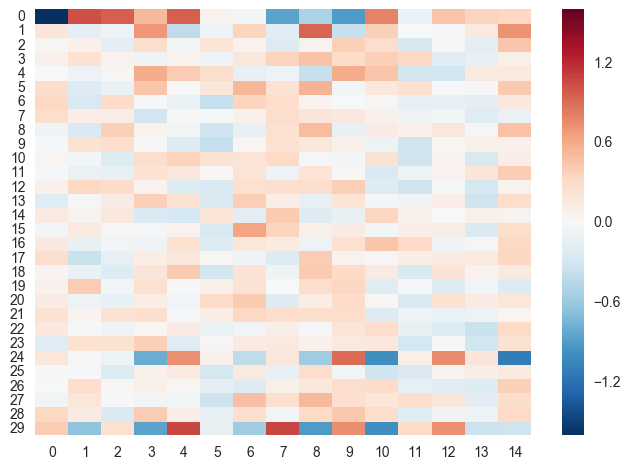

In [31]:
# print(X.shape, X_test.shape)
# for e in ae.get_weights():
#     print(e.shape)
sns.heatmap(ae.get_weights()[0])

In [44]:
pd.DataFrame(ae.get_weights()[0].reshape(ae.get_weights()[0].size)).describe()

,0
count,450.000000
mean,0.067805
std,0.305148
min,-1.603261
25%,-0.099177
50%,0.074505
75%,0.259327
max,1.073901


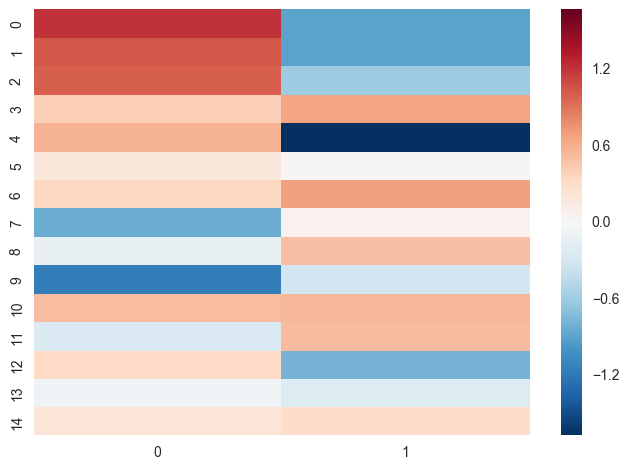

In [32]:
sns.heatmap(ae.get_weights()[2])

In [38]:
mse = ae.get_cost()

In [39]:
mse_per_feature = np.sqrt(mse) / 30

In [40]:
print(mse)
print(mse_per_feature)

0.0013743278265
0.00123573092473
